In [20]:
#Importar librerías y cargar base de datos

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("incident_event_log.csv")

In [21]:
# Resumen general de la base
# filas, columnas
print("Dimensiones del dataset:", df.shape)   

# Info básica
print(f"Filas totales: {len(df):,} | Columnas: {len(df.columns)}")


print("\nTipos de datos:")
# conteo de tipos de columnas
print(df.dtypes.value_counts())               

print("\nPrimeras 3 filas:")
display(df.head(3))

Dimensiones del dataset: (141712, 36)
Filas totales: 141,712 | Columnas: 36

Tipos de datos:
object    29
bool       4
int64      3
Name: count, dtype: int64

Primeras 3 filas:


,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00


In [22]:
#Reemplazar "?" por NaN
df=df.replace("?",np.nan)

# Total de filas
total_filas = len(df)

# Conteo de vacíos
faltantes = df.isna().sum()

# Porcentaje de vacíos
porcentaje_faltantes = (faltantes / total_filas) * 100

# DataFrame resumen
faltantes_df = pd.DataFrame({
    "Valores_faltantes": faltantes,
    "Porcentaje_faltantes": porcentaje_faltantes.round(2)
})

print(faltantes_df)

# --- Análisis de duplicados ---

# Número total de filas duplicadas
total_duplicados = df.duplicated().sum()
print(f"Total de filas duplicadas: {total_duplicados}")

# Mostrar las filas duplicadas (si existen)
if total_duplicados > 0:
    print("\n=== Filas duplicadas ===")
    display(df[df.duplicated(keep=False)])  # keep=False muestra todas las ocurrencias
else:
    print("\nNo se encontraron filas duplicadas.")

   

                         Valores_faltantes  Porcentaje_faltantes
number                                   0                  0.00
incident_state                           0                  0.00
active                                   0                  0.00
reassignment_count                       0                  0.00
reopen_count                             0                  0.00
sys_mod_count                            0                  0.00
made_sla                                 0                  0.00
caller_id                               29                  0.02
opened_by                             4835                  3.41
opened_at                                0                  0.00
sys_created_by                       53076                 37.45
sys_created_at                       53076                 37.45
sys_updated_by                           0                  0.00
sys_updated_at                           0                  0.00
contact_type             

In [23]:
# --- Identificación de tipos de variables ---

numeric_cols = df.select_dtypes(include=['int64','float64']).columns
categorical_cols = df.select_dtypes(include=['object','category']).columns

print("=== Variables numéricas detectadas ===")
print(list(numeric_cols))

print("\n=== Variables categóricas detectadas ===")
print(list(categorical_cols))

# --- Estadísticas para numéricas ---
if len(numeric_cols) > 0:
    print("\n=== Estadísticas descriptivas (numéricas) ===")
    display(df[numeric_cols].describe().T)
else:
    print("\nNo se encontraron variables numéricas.")

=== Variables numéricas detectadas ===
['reassignment_count', 'reopen_count', 'sys_mod_count']

=== Variables categóricas detectadas ===
['number', 'incident_state', 'caller_id', 'opened_by', 'opened_at', 'sys_created_by', 'sys_created_at', 'sys_updated_by', 'sys_updated_at', 'contact_type', 'location', 'category', 'subcategory', 'u_symptom', 'cmdb_ci', 'impact', 'urgency', 'priority', 'assignment_group', 'assigned_to', 'notify', 'problem_id', 'rfc', 'vendor', 'caused_by', 'closed_code', 'resolved_by', 'resolved_at', 'closed_at']

=== Estadísticas descriptivas (numéricas) ===


,count,mean,std,min,25%,50%,75%,max
reassignment_count,141712.0,1.104197,1.734673,0.0,0.0,1.0,1.0,27.0
reopen_count,141712.0,0.021918,0.207302,0.0,0.0,0.0,0.0,8.0
sys_mod_count,141712.0,5.080946,7.680652,0.0,1.0,3.0,6.0,129.0



=== Análisis univariado de: impact ===


,Frecuencia absoluta,Frecuencia relativa (%)
impact,,
2 - Medium,134335,94.79
3 - Low,3886,2.74
1 - High,3491,2.46


Moda de impact: 2 - Medium


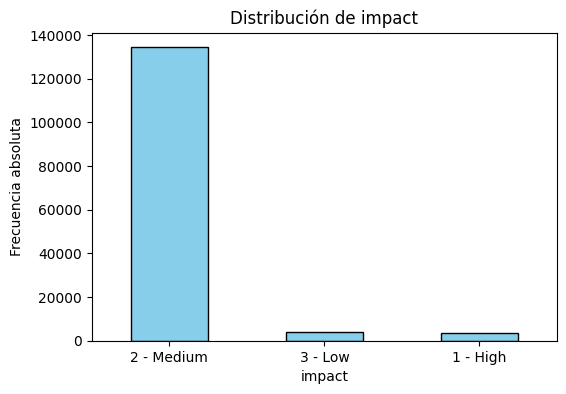


=== Análisis univariado de: urgency ===


,Frecuencia absoluta,Frecuencia relativa (%)
urgency,,
2 - Medium,134094,94.62
1 - High,4020,2.84
3 - Low,3598,2.54


Moda de urgency: 2 - Medium


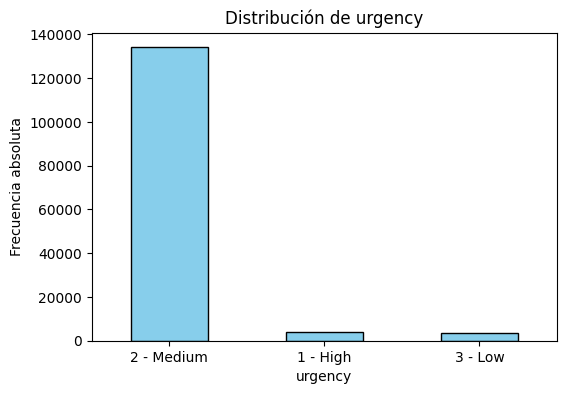


=== Análisis univariado de: priority ===


,Frecuencia absoluta,Frecuencia relativa (%)
priority,,
3 - Moderate,132452,93.47
4 - Low,4030,2.84
2 - High,2972,2.10
1 - Critical,2258,1.59


Moda de priority: 3 - Moderate


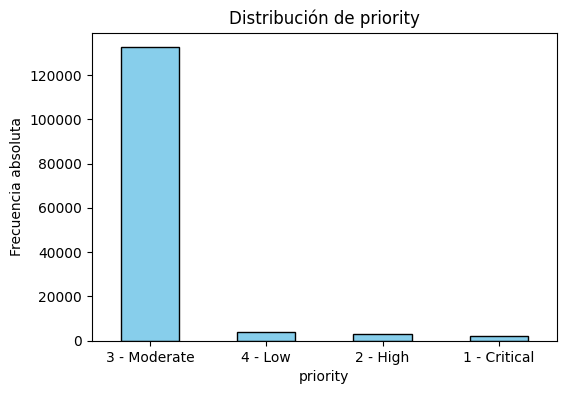

In [ ]:
# Variables de interés
vars_categoricas = ["impact", "urgency", "priority"]

for col in vars_categoricas:
    print(f"\n=== Análisis univariado de: {col} ===")
    
    # Frecuencias absoluta y relativa
    frec_abs = df[col].value_counts(dropna=False)
    frec_rel = df[col].value_counts(normalize=True, dropna=False) * 100
    
    # Tabla combinada
    tabla = pd.DataFrame({
        "Frecuencia absoluta": frec_abs,
        "Frecuencia relativa (%)": frec_rel.round(2)
    })
    
    display(tabla)
    
    # Moda (con control de error)
    moda = df[col].mode()
    if not moda.empty:
        print(f"Moda de {col}: {moda.iloc[0]}")
    else:
        print(f"Moda de {col}: no se pudo calcular (columna vacía o solo con NaN)")
    
    # Gráfico de barras
    if not frec_abs.empty:
        plt.figure(figsize=(6,4))
        frec_abs.plot(kind="bar", color="skyblue", edgecolor="black")
        plt.title(f"Distribución de {col}")
        plt.xlabel(col)
        plt.ylabel("Frecuencia absoluta")
        plt.xticks(rotation=0)
        plt.show()
    else:
        print(f"No se generó gráfico para {col} (columna vacía).")



=== Análisis univariado de: reassignment_count ===
Media: 1.10
Mediana: 1.00
Moda: 0
Varianza: 3.01
Desviación estándar: 1.73
Rango: 27
IQR (Q3 - Q1): 1.0
Valores atípicos detectados: 19635
Ejemplos de outliers: [3, 4, 5, 6, 6]


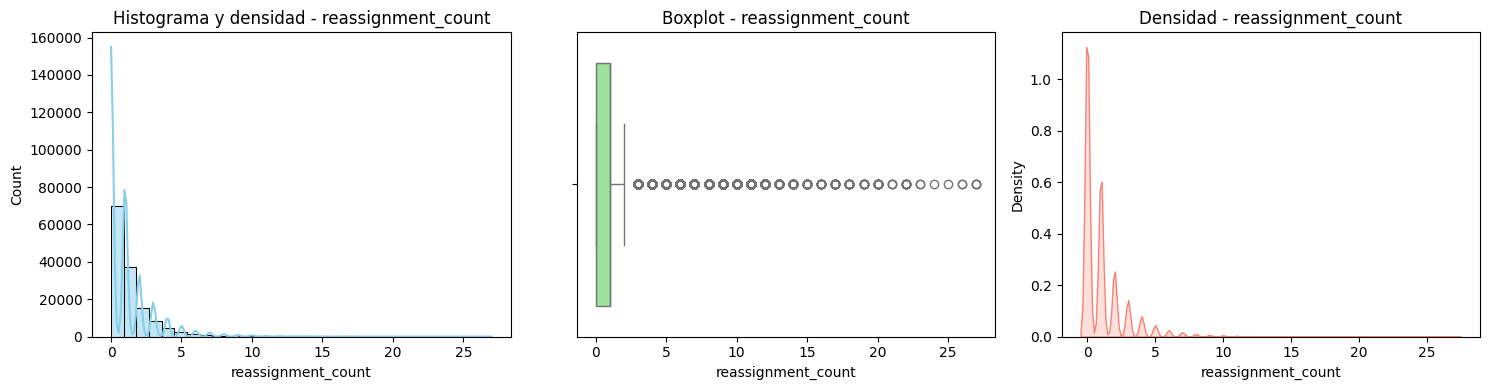


=== Análisis univariado de: reopen_count ===
Media: 0.02
Mediana: 0.00
Moda: 0
Varianza: 0.04
Desviación estándar: 0.21
Rango: 8
IQR (Q3 - Q1): 0.0
Valores atípicos detectados: 2314
Ejemplos de outliers: [1, 1, 1, 1, 1]


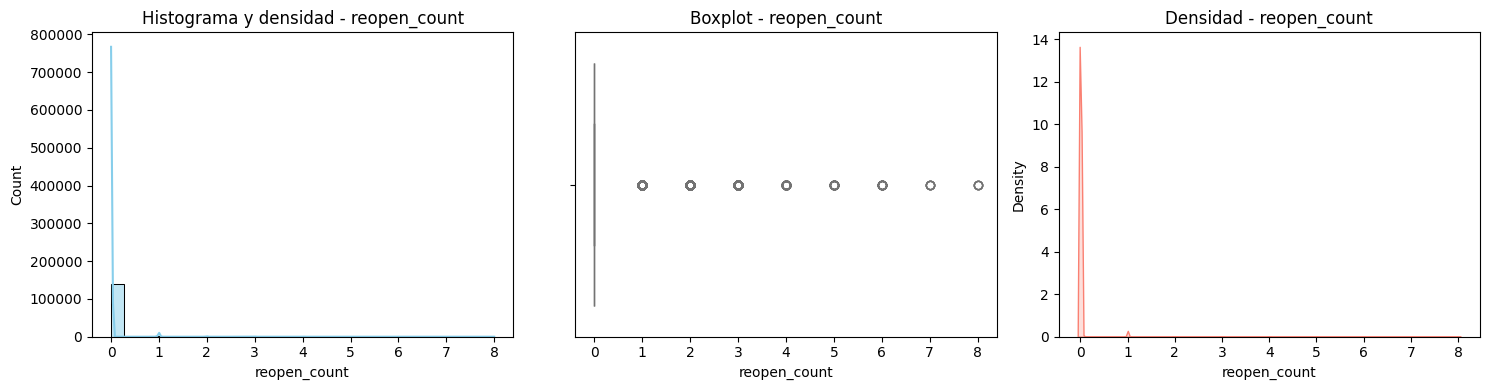

In [25]:
import seaborn as sns

# Variables numéricas de fricción operativa
vars_numericas = ["reassignment_count", "reopen_count"]

for col in vars_numericas:
    print(f"\n=== Análisis univariado de: {col} ===")
    
    serie = df[col].dropna()  # quitar NaN para evitar problemas
    
    # --- Medidas de tendencia central ---
    media = serie.mean()
    mediana = serie.median()
    moda = serie.mode()
    moda_valor = moda.iloc[0] if not moda.empty else None
    
    print(f"Media: {media:.2f}")
    print(f"Mediana: {mediana:.2f}")
    print(f"Moda: {moda_valor}")
    
    # --- Medidas de dispersión ---
    varianza = serie.var()
    desviacion = serie.std()
    rango = serie.max() - serie.min()
    q1 = serie.quantile(0.25)
    q3 = serie.quantile(0.75)
    iqr = q3 - q1
    
    print(f"Varianza: {varianza:.2f}")
    print(f"Desviación estándar: {desviacion:.2f}")
    print(f"Rango: {rango}")
    print(f"IQR (Q3 - Q1): {iqr}")
    
    # --- Identificación de valores atípicos ---
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr
    outliers = serie[(serie < limite_inferior) | (serie > limite_superior)]
    
    print(f"Valores atípicos detectados: {len(outliers)}")
    if len(outliers) > 0:
        print(f"Ejemplos de outliers: {outliers.head().to_list()}")
    
    # --- Gráficos ---
    plt.figure(figsize=(15,4))
    
    # Histograma + densidad
    plt.subplot(1,3,1)
    sns.histplot(serie, kde=True, bins=30, color="skyblue")
    plt.title(f"Histograma y densidad - {col}")
    
    # Boxplot
    plt.subplot(1,3,2)
    sns.boxplot(x=serie, color="lightgreen")
    plt.title(f"Boxplot - {col}")
    
    # Distribución de densidad sola
    plt.subplot(1,3,3)
    sns.kdeplot(serie, fill=True, color="salmon")
    plt.title(f"Densidad - {col}")
    
    plt.tight_layout()
    plt.show()


=== Análisis univariado de: contact_type ===


,Frecuencia absoluta,Frecuencia relativa (%)
contact_type,,
Phone,140462,99.12
Self service,995,0.70
Email,220,0.16
IVR,18,0.01
Direct opening,17,0.01


Moda de contact_type: Phone


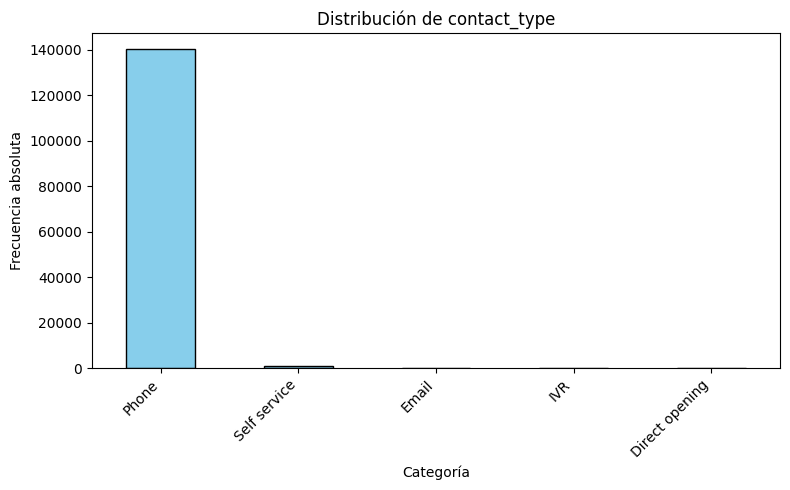

In [26]:
# Variable categórica de interés
col = "contact_type"

print(f"\n=== Análisis univariado de: {col} ===")

# Frecuencias absoluta y relativa
frec_abs = df[col].value_counts(dropna=False)
frec_rel = df[col].value_counts(normalize=True, dropna=False) * 100

# Tabla combinada
tabla = pd.DataFrame({
    "Frecuencia absoluta": frec_abs,
    "Frecuencia relativa (%)": frec_rel.round(2)
})

display(tabla)

# Moda
moda = df[col].mode()
if not moda.empty:
    print(f"Moda de {col}: {moda.iloc[0]}")
else:
    print(f"Moda de {col}: no se pudo calcular (columna vacía o solo NaN)")

# Gráfico de barras (frecuencia absoluta)
plt.figure(figsize=(8,5))
frec_abs.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title(f"Distribución de {col}")
plt.xlabel("Categoría")
plt.ylabel("Frecuencia absoluta")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


=== Análisis univariado de: category (filtrado >0.3%) ===


,Frecuencia absoluta,Frecuencia relativa (%)
category,,
Category 26,18453,13.02
Category 42,15977,11.27
Category 53,15968,11.27
Category 46,13324,9.40
Category 23,7779,5.49
Category 9,7365,5.20
Category 32,7273,5.13
Category 37,6584,4.65
Category 57,6532,4.61


Moda de category: Category 26


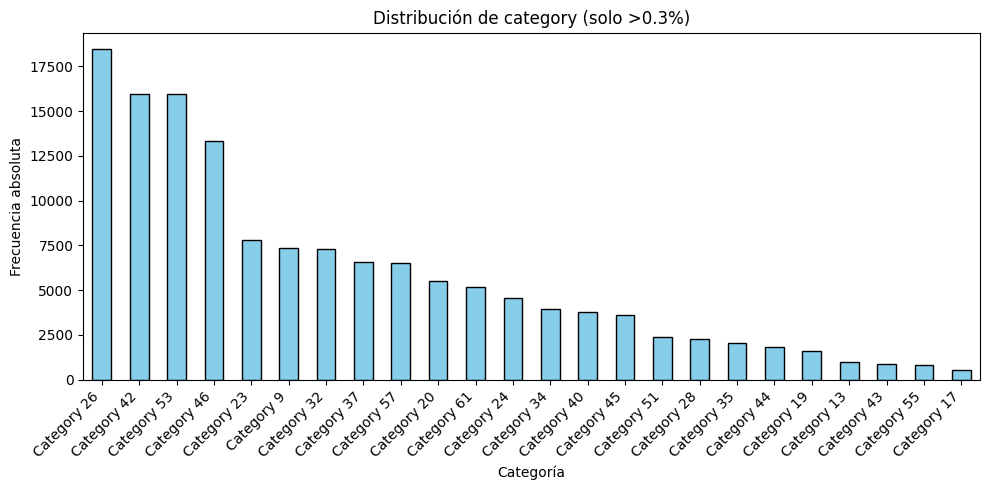


=== Análisis univariado de: subcategory (filtrado >0.3%) ===


,Frecuencia absoluta,Frecuencia relativa (%)
subcategory,,
Subcategory 174,35785,25.25
Subcategory 223,15598,11.01
Subcategory 175,10496,7.41
Subcategory 164,7880,5.56
Subcategory 9,4124,2.91
Subcategory 275,3643,2.57
Subcategory 135,3467,2.45
Subcategory 170,3349,2.36
Subcategory 36,2917,2.06


Moda de subcategory: Subcategory 174


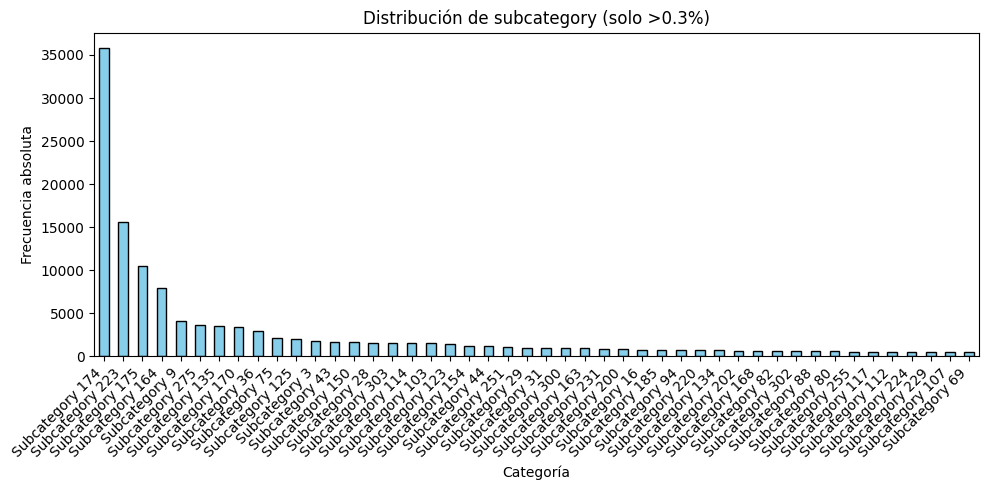

In [32]:
# Variables categóricas de interés
vars_categoricas = ["category", "subcategory"]

for col in vars_categoricas:
    print(f"\n=== Análisis univariado de: {col} (filtrado >0.3%) ===")
    
    # Frecuencias absoluta y relativa
    frec_abs = df[col].value_counts(dropna=False)
    frec_rel = df[col].value_counts(normalize=True, dropna=False) * 100
    
    # Tabla combinada
    tabla = pd.DataFrame({
        "Frecuencia absoluta": frec_abs,
        "Frecuencia relativa (%)": frec_rel.round(2)
    })
    
    # Filtrar solo las categorías con frecuencia relativa > 0.3
    tabla_filtrada = tabla[tabla["Frecuencia relativa (%)"] > 0.3]
    
    display(tabla_filtrada)
    
    # Moda
    moda = df[col].mode()
    if not moda.empty:
        print(f"Moda de {col}: {moda.iloc[0]}")
    else:
        print(f"Moda de {col}: no se pudo calcular (columna vacía o solo NaN)")
    
    # Gráfico de barras solo con las categorías filtradas
    plt.figure(figsize=(10,5))
    tabla_filtrada["Frecuencia absoluta"].plot(kind="bar", color="skyblue", edgecolor="black")
    plt.title(f"Distribución de {col} (solo >0.3%)")
    plt.xlabel("Categoría")
    plt.ylabel("Frecuencia absoluta")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


=== Análisis univariado temporal de: opened_at ===


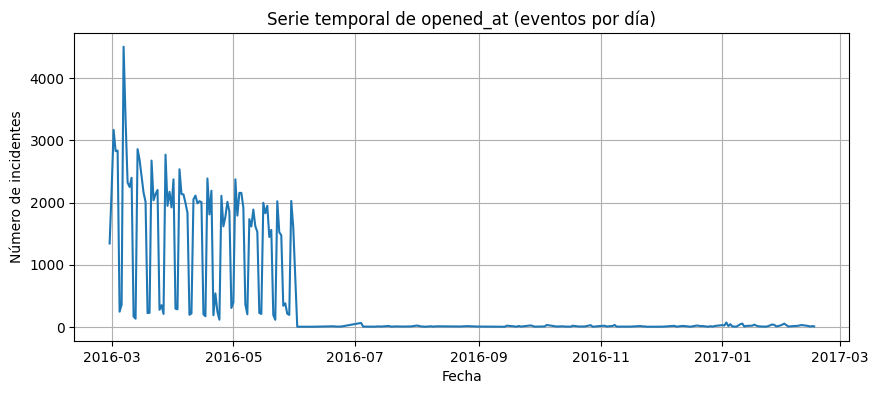

<Figure size 1000x400 with 0 Axes>

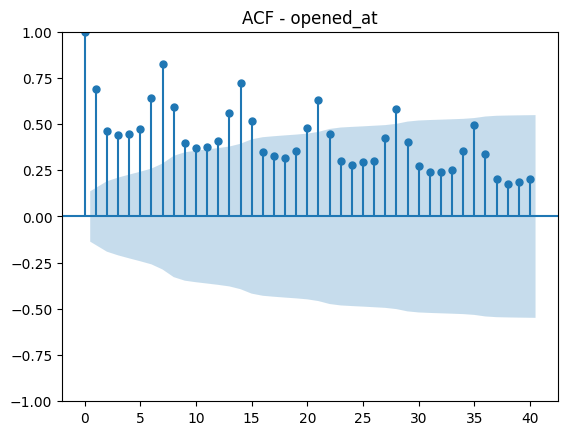

<Figure size 1000x400 with 0 Axes>

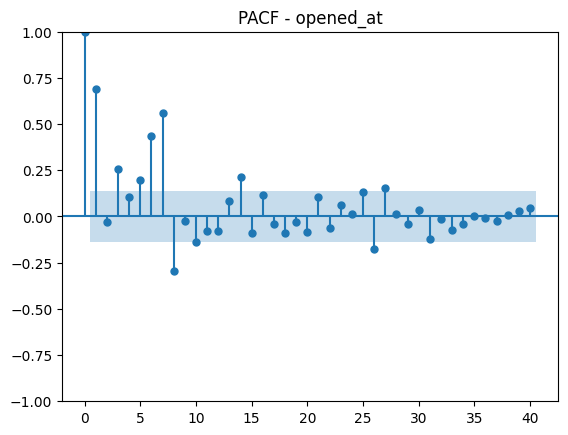

Resumen:
- Periodo analizado: 2016-02-29 a 2017-02-16
- Total de incidentes: 141712
- Promedio diario: 684.60
- Día con más incidentes: 2016-03-07 (4506)
- Día con menos incidentes: 2016-06-02 (3)

=== Análisis univariado temporal de: resolved_at ===


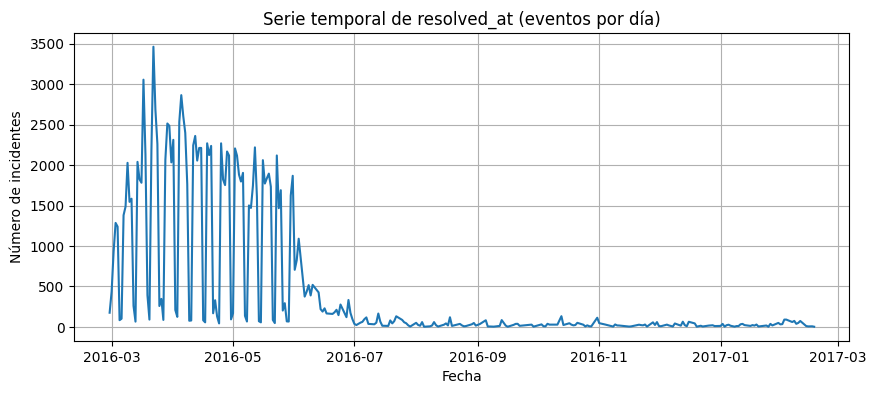

<Figure size 1000x400 with 0 Axes>

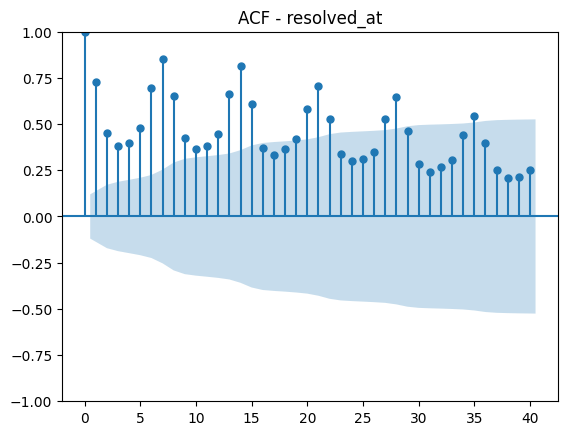

<Figure size 1000x400 with 0 Axes>

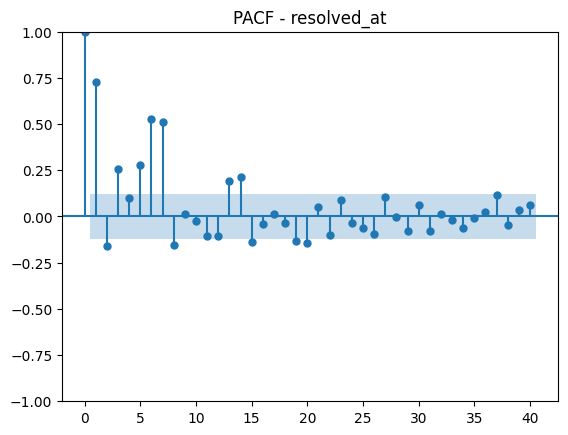

Resumen:
- Periodo analizado: 2016-02-29 a 2017-02-17
- Total de incidentes: 138571
- Promedio diario: 517.06
- Día con más incidentes: 2016-03-22 (3461)
- Día con menos incidentes: 2016-08-05 (3)

=== Análisis univariado temporal de: closed_at ===


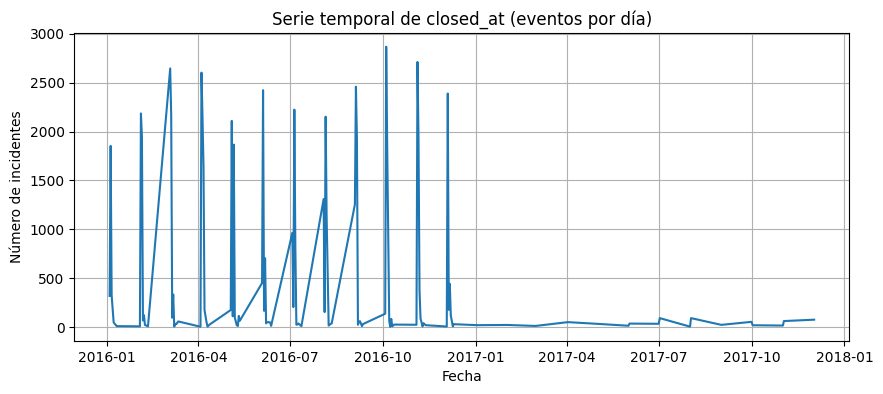

<Figure size 1000x400 with 0 Axes>

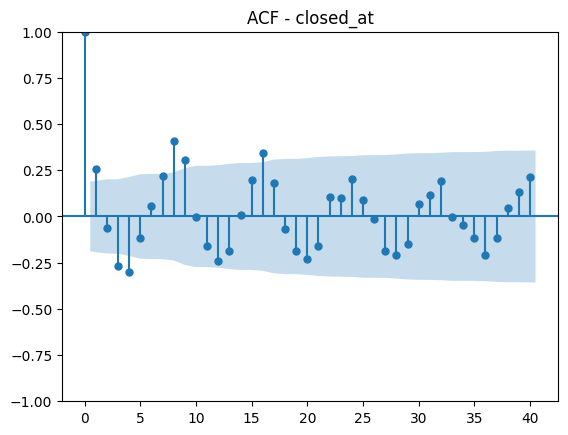

<Figure size 1000x400 with 0 Axes>

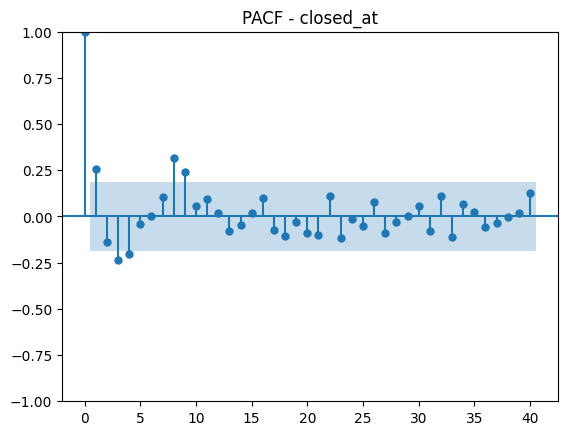

Resumen:
- Periodo analizado: 2016-01-04 a 2017-12-02
- Total de incidentes: 56316
- Promedio diario: 521.44
- Día con más incidentes: 2016-10-04 (2868)
- Día con menos incidentes: 2016-04-03 (3)


In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Variables temporales
vars_temporales = ["opened_at", "resolved_at", "closed_at"]

# Convertir a datetime si no lo están
for col in vars_temporales:
    df[col] = pd.to_datetime(df[col], errors="coerce")

for col in vars_temporales:
    print(f"\n=== Análisis univariado temporal de: {col} ===")
    
    # Conteo de eventos por día
    serie_tiempo = df[col].dt.date.value_counts().sort_index()
    
    # Plot de la serie de tiempo
    plt.figure(figsize=(10,4))
    serie_tiempo.plot()
    plt.title(f"Serie temporal de {col} (eventos por día)")
    plt.xlabel("Fecha")
    plt.ylabel("Número de incidentes")
    plt.grid(True)
    plt.show()
    
    # Gráfico ACF
    plt.figure(figsize=(10,4))
    plot_acf(serie_tiempo, lags=40)
    plt.title(f"ACF - {col}")
    plt.show()
    
    # Gráfico PACF
    plt.figure(figsize=(10,4))
    plot_pacf(serie_tiempo, lags=40, method="ywm")
    plt.title(f"PACF - {col}")
    plt.show()
    
    # Resumen descriptivo
    print("Resumen:")
    print(f"- Periodo analizado: {serie_tiempo.index.min()} a {serie_tiempo.index.max()}")
    print(f"- Total de incidentes: {serie_tiempo.sum()}")
    print(f"- Promedio diario: {serie_tiempo.mean():.2f}")
    print(f"- Día con más incidentes: {serie_tiempo.idxmax()} ({serie_tiempo.max()})")
    print(f"- Día con menos incidentes: {serie_tiempo.idxmin()} ({serie_tiempo.min()})")

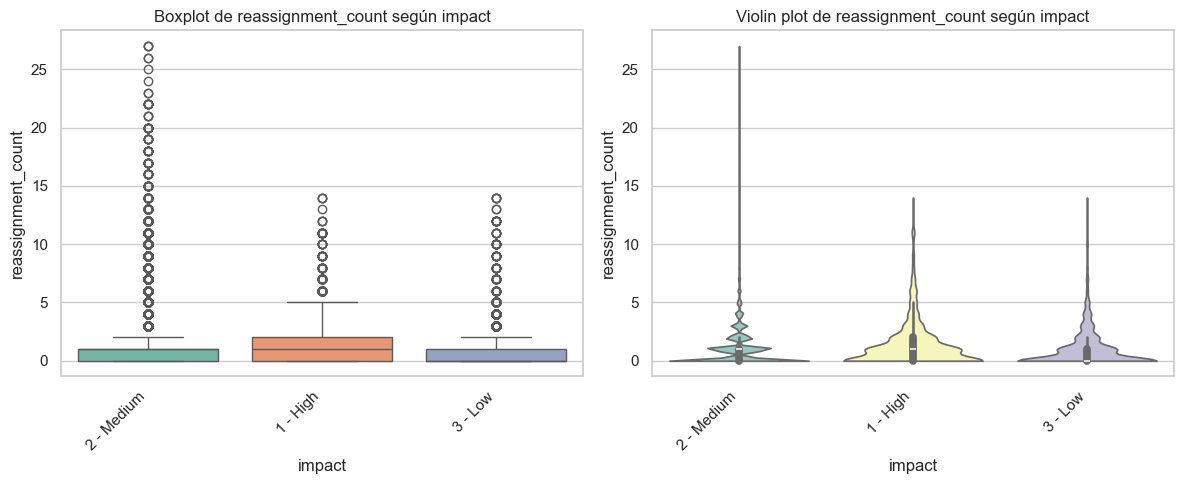

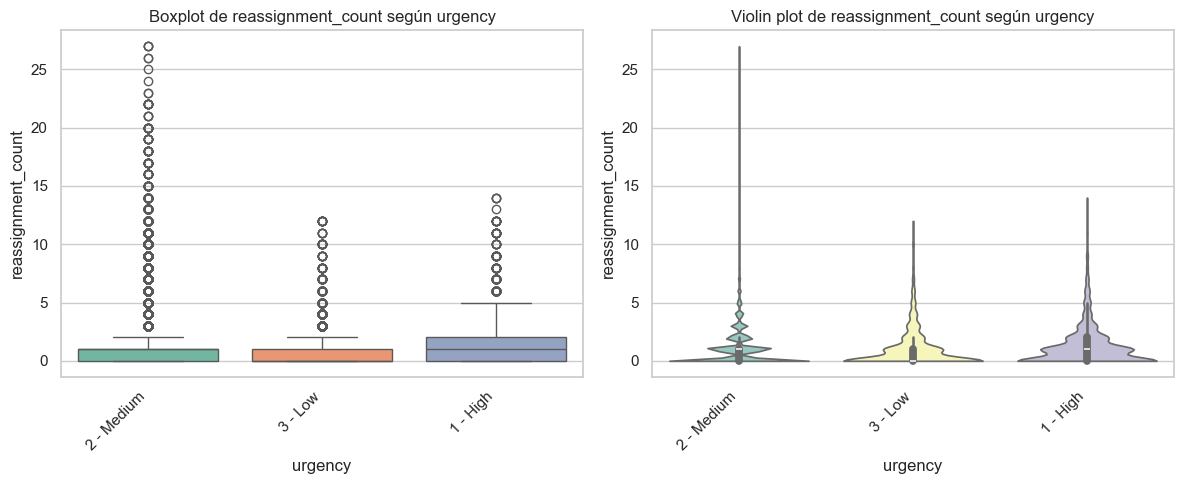

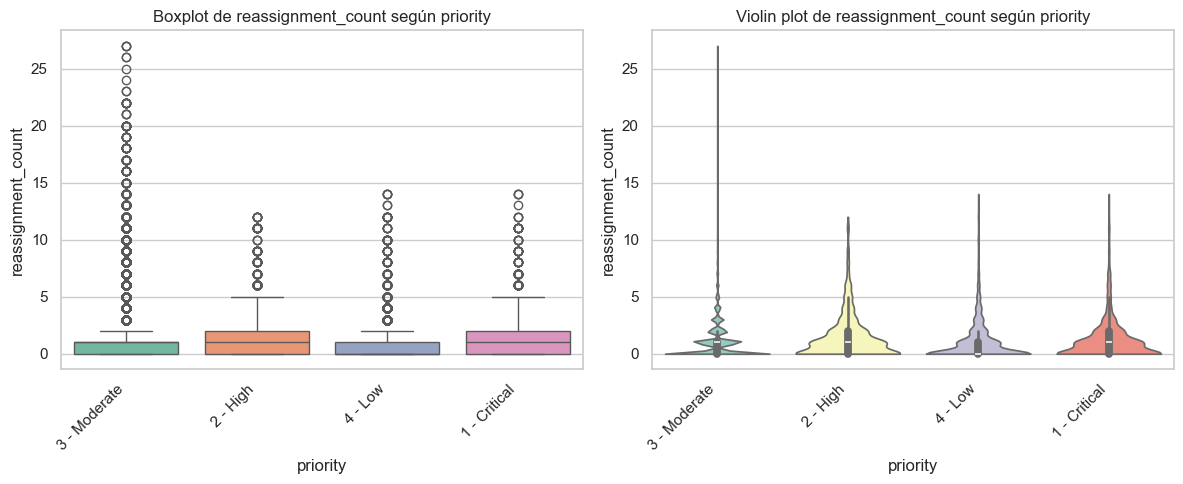

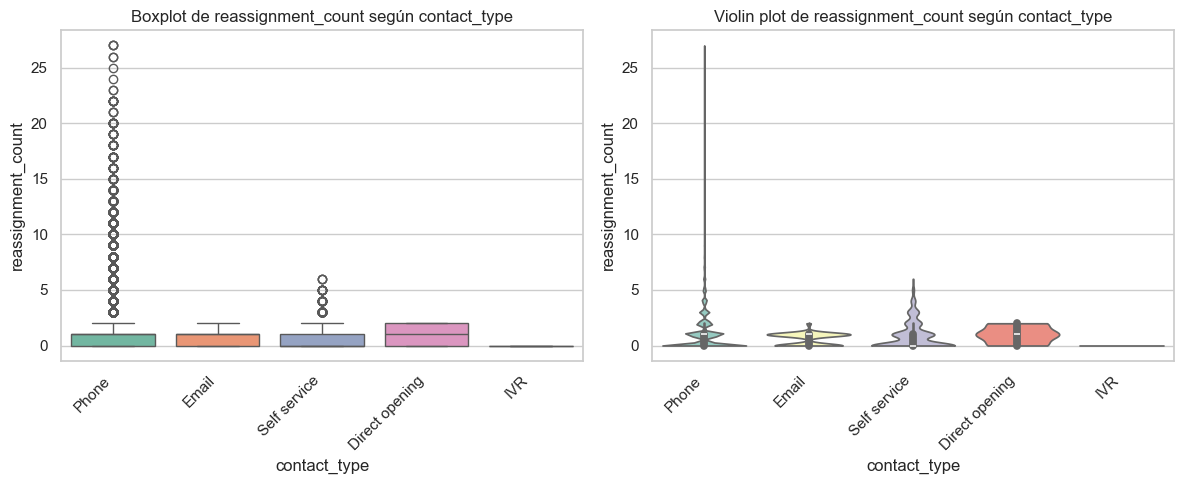

In [ ]:
# Variables numéricas y categóricas significativas
num_vars = ["reassignment_count"]
cat_vars = ["impact", "urgency", "priority", "contact_type"]

# Ajustes generales de estilo
sns.set(style="whitegrid")

for num in num_vars:
    for cat in cat_vars:
        plt.figure(figsize=(12,5))
        
        # Boxplot
        plt.subplot(1,2,1)
        sns.boxplot(x=cat, y=num, data=df, palette="Set2")
        plt.title(f"Boxplot de {num} según {cat}")
        plt.xticks(rotation=45, ha="right")
        
        # Diagrama de violín
        plt.subplot(1,2,2)
        sns.violinplot(x=cat, y=num, data=df, palette="Set3", cut=0)
        plt.title(f"Violin plot de {num} según {cat}")
        plt.xticks(rotation=45, ha="right")
        
        plt.tight_layout()
        plt.show()


=== Contingencia: impact vs urgency vs priority ===


priority               1 - Critical  2 - High  3 - Moderate  4 - Low     All
impact     urgency                                                          
1 - High   1 - High            2258         0             0        0    2258
           2 - Medium             0      1233             0        0    1233
2 - Medium 1 - High               0      1739             0        0    1739
           2 - Medium             0         0        132429        0  132429
           3 - Low                0         0             0      167     167
3 - Low    1 - High               0         0            23        0      23
           2 - Medium             0         0             0      432     432
           3 - Low                0         0             0     3431    3431
All                            2258      2972        132452     4030  141712


% por fila (impact, urgency → priority):


priority               1 - Critical  2 - High  3 - Moderate  4 - Low
impact     urgency                                                  
1 - High   1 - High           100.0       0.0           0.0      0.0
           2 - Medium           0.0     100.0           0.0      0.0
2 - Medium 1 - High             0.0     100.0           0.0      0.0
           2 - Medium           0.0       0.0         100.0      0.0
           3 - Low              0.0       0.0           0.0    100.0
3 - Low    1 - High             0.0       0.0         100.0      0.0
           2 - Medium           0.0       0.0           0.0    100.0
           3 - Low              0.0       0.0           0.0    100.0

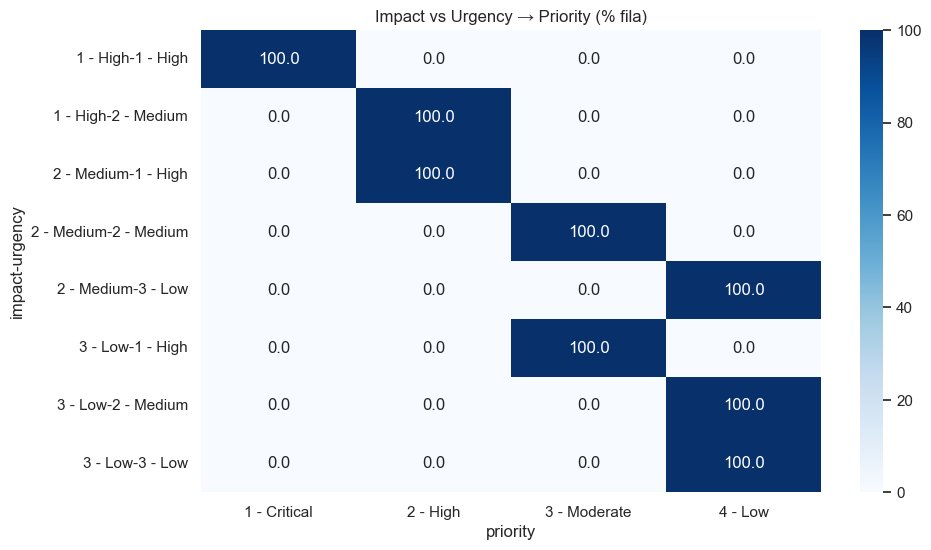


=== Tabla de contingencia: Impact vs Urgency ===


urgency,1 - High,2 - Medium,3 - Low
impact,,,
1 - High,2258,1233,0
2 - Medium,1739,132429,167
3 - Low,23,432,3431



% por fila (Impact):


urgency,1 - High,2 - Medium,3 - Low
impact,,,
1 - High,64.7,35.3,0.0
2 - Medium,1.3,98.6,0.1
3 - Low,0.6,11.1,88.3



% por columna (Urgency):


urgency,1 - High,2 - Medium,3 - Low
impact,,,
1 - High,56.2,0.9,0.0
2 - Medium,43.3,98.8,4.6
3 - Low,0.6,0.3,95.4


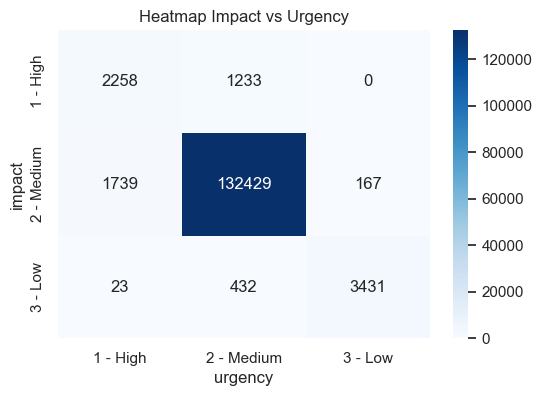


=== Tabla de contingencia: Impact vs Priority ===


priority,1 - Critical,2 - High,3 - Moderate,4 - Low
impact,,,,
1 - High,2258,1233,0,0
2 - Medium,0,1739,132429,167
3 - Low,0,0,23,3863


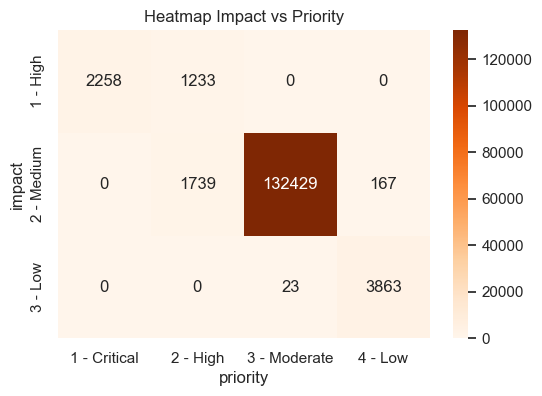


=== Tabla de contingencia: Contact_type vs Urgency ===


urgency,1 - High,2 - Medium,3 - Low
contact_type,,,
Direct opening,0,17,0
Email,4,216,0
IVR,0,18,0
Phone,3978,132886,3598
Self service,38,957,0



% por fila (Contact_type):


urgency,1 - High,2 - Medium,3 - Low
contact_type,,,
Direct opening,0.0,100.0,0.0
Email,1.8,98.2,0.0
IVR,0.0,100.0,0.0
Phone,2.8,94.6,2.6
Self service,3.8,96.2,0.0



% por columna (Urgency):


urgency,1 - High,2 - Medium,3 - Low
contact_type,,,
Direct opening,0.0,0.0,0.0
Email,0.1,0.2,0.0
IVR,0.0,0.0,0.0
Phone,99.0,99.1,100.0
Self service,0.9,0.7,0.0


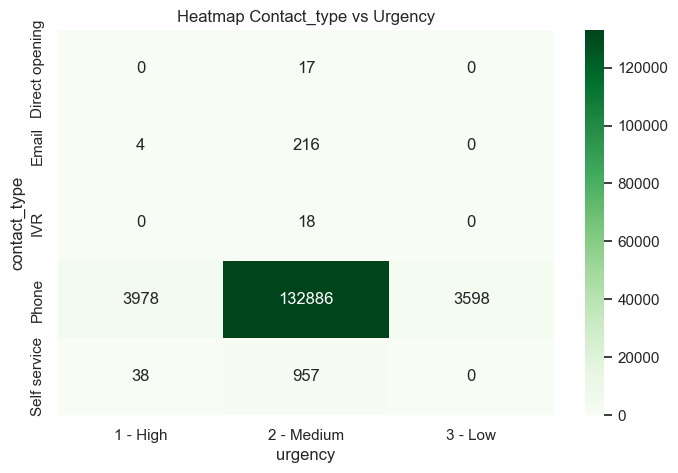

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Impact vs Urgency vs Priority ---
print("\n=== Contingencia: impact vs urgency vs priority ===")
tabla_iup = pd.crosstab([df["impact"], df["urgency"]], df["priority"], margins=True, normalize=False)
display(tabla_iup)

# Porcentajes por fila
tabla_iup_row = pd.crosstab([df["impact"], df["urgency"]], df["priority"], normalize="index") * 100
print("\n% por fila (impact, urgency → priority):")
display(tabla_iup_row.round(2))

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(tabla_iup_row, annot=True, fmt=".1f", cmap="Blues")
plt.title("Impact vs Urgency → Priority (% fila)")
plt.show()

# Función para construir tabla de contingencia con porcentajes
def tabla_contingencia(df, var1, var2, normalize=None):
    """
    normalize=None → frecuencias absolutas
    normalize='index' → porcentajes por fila
    normalize='columns' → porcentajes por columna
    """
    return pd.crosstab(df[var1], df[var2], normalize=normalize).round(3) * (100 if normalize else 1)

# 1. Impact vs Urgency vs Priority
print("\n=== Tabla de contingencia: Impact vs Urgency ===")
tabla_impact_urgency = pd.crosstab(df["impact"], df["urgency"])
display(tabla_impact_urgency)

print("\n% por fila (Impact):")
display(tabla_contingencia(df, "impact", "urgency", normalize="index"))

print("\n% por columna (Urgency):")
display(tabla_contingencia(df, "impact", "urgency", normalize="columns"))

plt.figure(figsize=(6,4))
sns.heatmap(tabla_impact_urgency, annot=True, fmt="d", cmap="Blues")
plt.title("Heatmap Impact vs Urgency")
plt.show()

print("\n=== Tabla de contingencia: Impact vs Priority ===")
tabla_impact_priority = pd.crosstab(df["impact"], df["priority"])
display(tabla_impact_priority)

plt.figure(figsize=(6,4))
sns.heatmap(tabla_impact_priority, annot=True, fmt="d", cmap="Oranges")
plt.title("Heatmap Impact vs Priority")
plt.show()

print("\n=== Tabla de contingencia: Contact_type vs Urgency ===")
tabla_contact_urgency = pd.crosstab(df["contact_type"], df["urgency"])
display(tabla_contact_urgency)

print("\n% por fila (Contact_type):")
display(tabla_contingencia(df, "contact_type", "urgency", normalize="index"))

print("\n% por columna (Urgency):")
display(tabla_contingencia(df, "contact_type", "urgency", normalize="columns"))

plt.figure(figsize=(8,5))
sns.heatmap(tabla_contact_urgency, annot=True, fmt="d", cmap="Greens")
plt.title("Heatmap Contact_type vs Urgency")
plt.show()


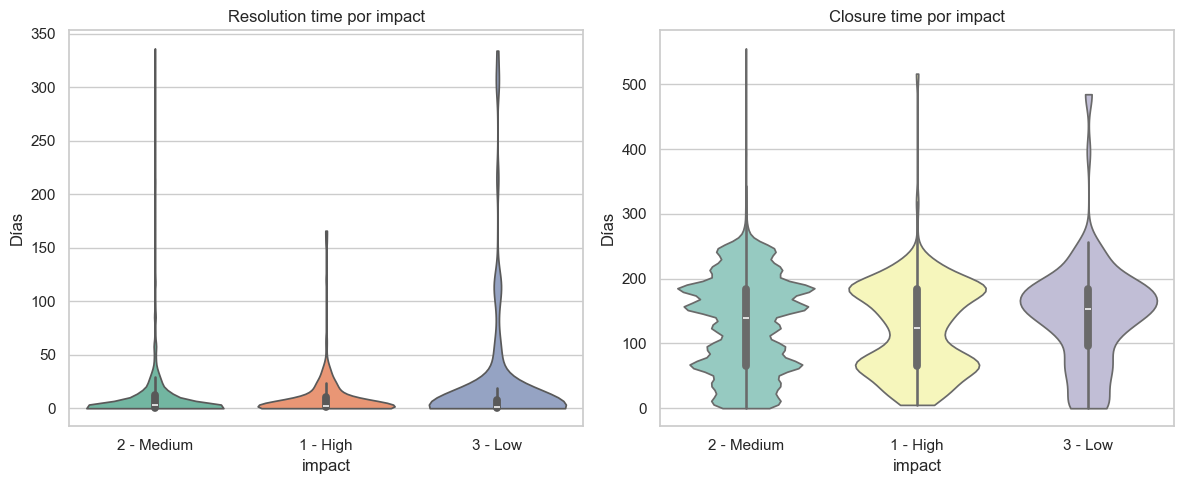

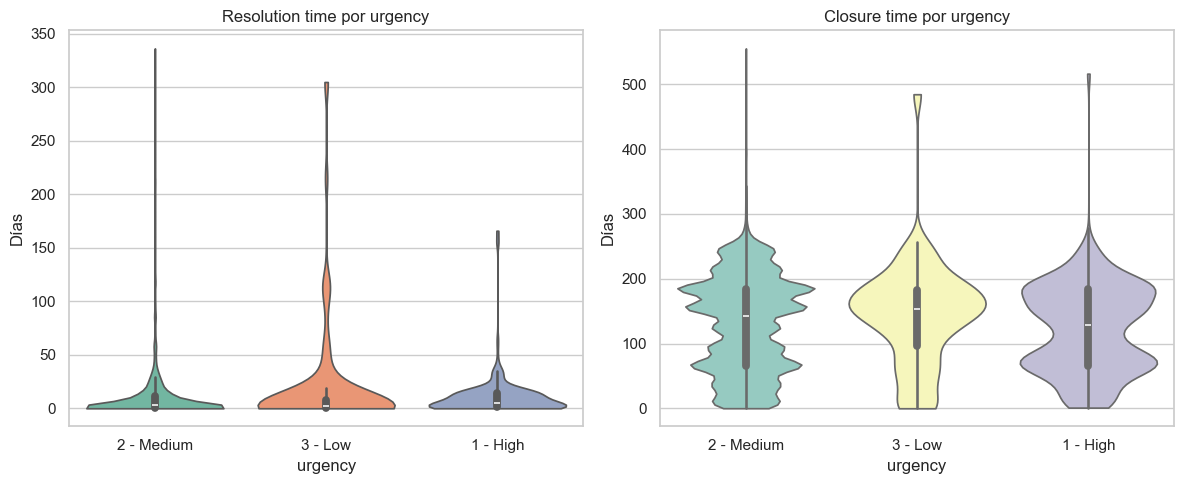

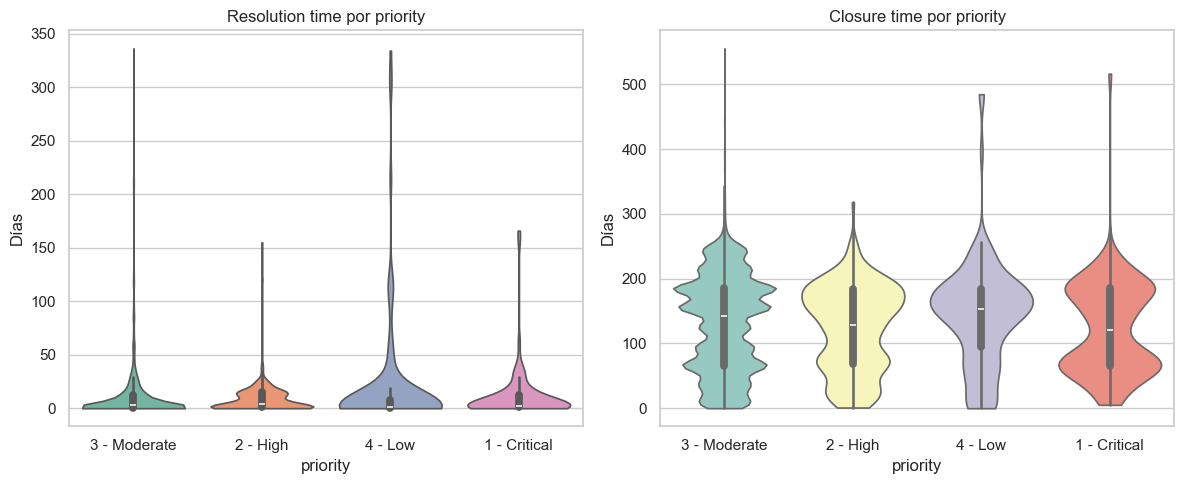

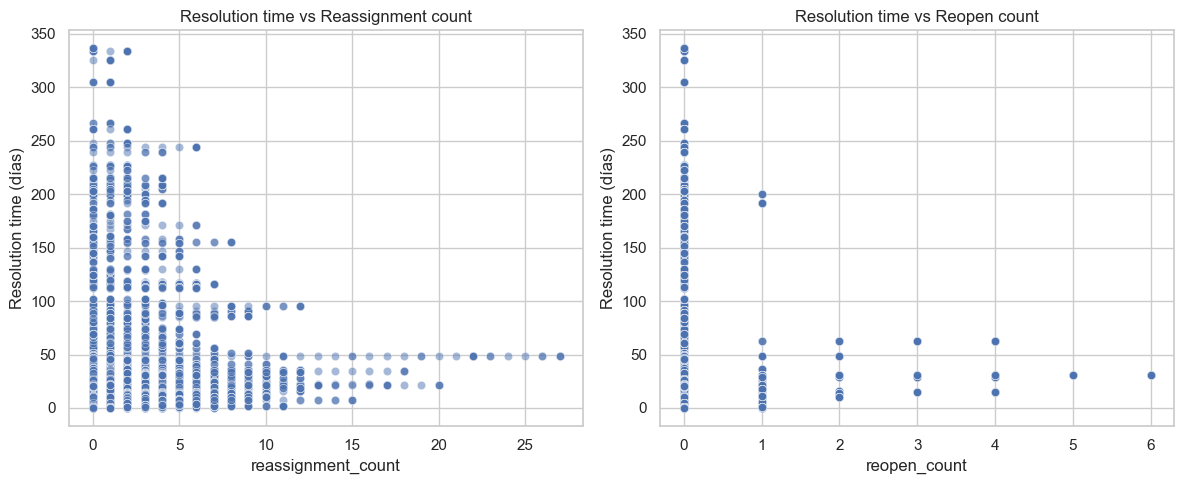

In [46]:
# --- Asegurar formato datetime ---
df["opened_at"] = pd.to_datetime(df["opened_at"], errors="coerce")
df["resolved_at"] = pd.to_datetime(df["resolved_at"], errors="coerce")
df["closed_at"] = pd.to_datetime(df["closed_at"], errors="coerce")

# --- Calcular resolution_time y closure_time en días ---
df["resolution_time"] = (df["resolved_at"] - df["opened_at"]).dt.total_seconds() / 86400
df["closure_time"] = (df["closed_at"] - df["opened_at"]).dt.total_seconds() / 86400

# --- Filtrar tiempos negativos o NaN ---
df = df[(df["resolution_time"] >= 0) & (df["closure_time"] >= 0)]

# --- Variables categóricas ---
cat_vars = ["impact", "urgency", "priority"]

# === Diagramas de violín ===
for col in cat_vars:
    plt.figure(figsize=(12,5))
    
    # Resolution time
    plt.subplot(1,2,1)
    sns.violinplot(x=col, y="resolution_time", data=df, palette="Set2", cut=0)
    plt.title(f"Resolution time por {col}")
    plt.ylabel("Días")
    
    # Closure time
    plt.subplot(1,2,2)
    sns.violinplot(x=col, y="closure_time", data=df, palette="Set3", cut=0)
    plt.title(f"Closure time por {col}")
    plt.ylabel("Días")
    
    plt.tight_layout()
    plt.show()

# === Scatter plots con reassignment_count y reopen_count ===
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(x="reassignment_count", y="resolution_time", data=df, alpha=0.5)
plt.title("Resolution time vs Reassignment count")
plt.ylabel("Resolution time (días)")

plt.subplot(1,2,2)
sns.scatterplot(x="reopen_count", y="resolution_time", data=df, alpha=0.5)
plt.title("Resolution time vs Reopen count")
plt.ylabel("Resolution time (días)")

plt.tight_layout()
plt.show()




=== Matriz de correlación (Pearson) ===


,reassignment_count,reopen_count,resolution_time,closure_time
reassignment_count,1.00,0.17,0.17,-0.00
reopen_count,0.17,1.00,0.05,-0.02
resolution_time,0.17,0.05,1.00,0.02
closure_time,-0.00,-0.02,0.02,1.00


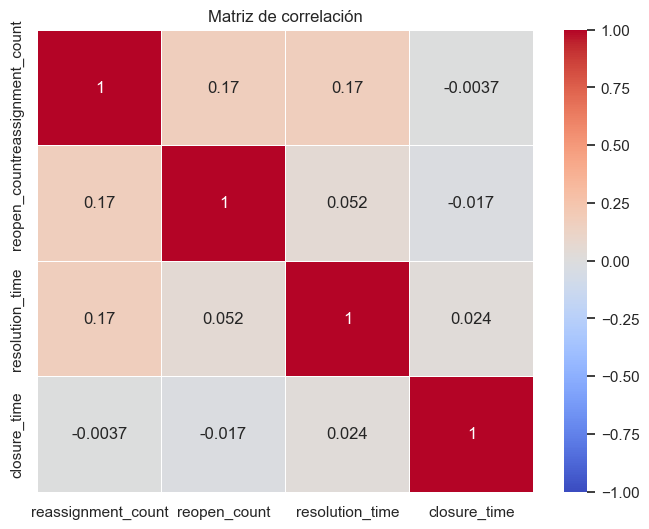

In [47]:
# Seleccionar variables de interés
vars_corr = ["reassignment_count", "reopen_count", "resolution_time", "closure_time"]

# Matriz de correlación (Pearson)
corr_matrix = df[vars_corr].corr(method="pearson")

print("\n=== Matriz de correlación (Pearson) ===")
display(corr_matrix.round(2))

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
plt.title("Matriz de correlación")
plt.show()


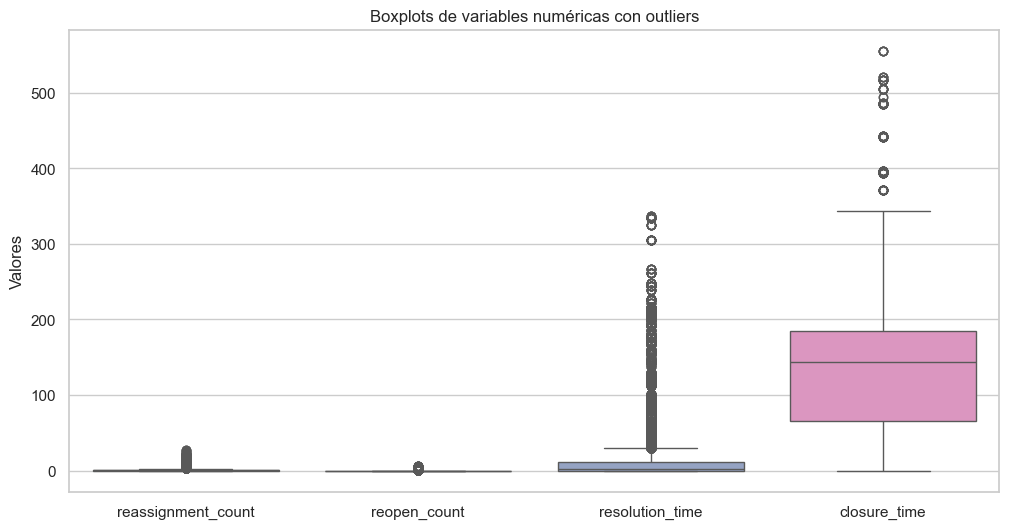


=== reassignment_count ===
Outliers detectados: 5344 (14.13% de la muestra)
Ejemplos de índices: [55, 56, 57, 58, 59, 60, 61, 162, 163, 164]
Rango de valores outliers: (np.int64(3), np.int64(27))

=== reopen_count ===
Outliers detectados: 660 (1.75% de la muestra)
Ejemplos de índices: [1727, 1728, 1729, 1730, 1731, 1732, 1733, 1734, 1735, 1736]
Rango de valores outliers: (np.int64(1), np.int64(6))

=== resolution_time ===
Outliers detectados: 3323 (8.79% de la muestra)
Ejemplos de índices: [522, 523, 524, 525, 526, 527, 528, 529, 530, 531]
Rango de valores outliers: (np.float64(29.90625), np.float64(336.25694444444446))

=== closure_time ===
Outliers detectados: 122 (0.32% de la muestra)
Ejemplos de índices: [5611, 5612, 5613, 5614, 5615, 5616, 5617, 5618, 5619, 5620]
Rango de valores outliers: (np.float64(370.89444444444445), np.float64(555.6256944444444))


In [49]:
# Variables numéricas
num_vars = ["reassignment_count", "reopen_count", "resolution_time", "closure_time"]

# --- Boxplots múltiples en paralelo ---
plt.figure(figsize=(12,6))
sns.boxplot(data=df[num_vars], orient="v", palette="Set2")
plt.title("Boxplots de variables numéricas con outliers")
plt.ylabel("Valores")
plt.show()

# --- Detección de outliers usando criterio de Tukey (1.5 * IQR) ---
outliers_info = {}

for col in num_vars:
    serie = df[col].dropna()
    q1 = serie.quantile(0.25)
    q3 = serie.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    
    outliers = df[(df[col] < lower) | (df[col] > upper)][[col]]
    
    outliers_info[col] = {
        "total_outliers": len(outliers),
        "porcentaje": round(len(outliers)/len(df)*100, 2),
        "indices": outliers.index.tolist()[:10],  # solo mostrar primeros 10
        "rango_outliers": (outliers[col].min(), outliers[col].max()) if not outliers.empty else None
    }

# Mostrar resultados
for var, info in outliers_info.items():
    print(f"\n=== {var} ===")
    print(f"Outliers detectados: {info['total_outliers']} ({info['porcentaje']}% de la muestra)")
    print(f"Ejemplos de índices: {info['indices']}")
    print(f"Rango de valores outliers: {info['rango_outliers']}")